# Seaborn은 Matplotlib을 예쁘게 꾸며준다는 느낌으로 사용한다. 

* pip(pip3) install seaborn 으로 패키지 설치 
* 반드시 matplotlib을 import해서 사용 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
x = np.linspace(0, 14, 100)

y1 = np.sin(x)
y2 = 2 * np.sin(x+0.5)
y3 = 3 * np.sin(x+1.0)
y4 = 4 * np.sin(x+1.5)

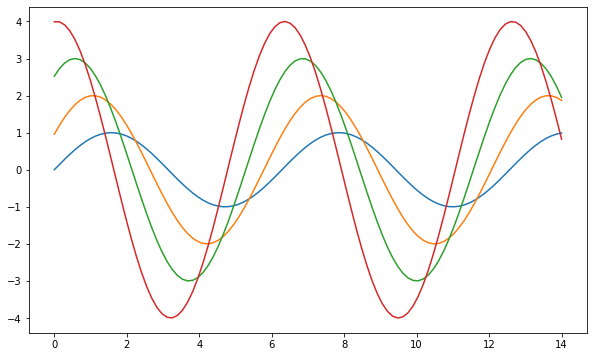

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(x,y1, x,y2, x,y3, x,y4)

plt.show()

In [4]:
# seaborn 활용을 위해서는 반드시 matplotlib을 import 해야 한다. 
import seaborn as sns

seaborn으로 스타일 등을 설정하면 matplotlib도 그 영향을 받는다.

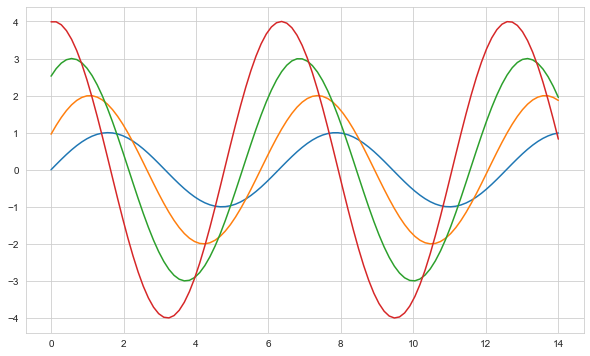

In [5]:
sns.set_style('whitegrid') # seaborn의 whitegrid 스타일 적용

plt.figure(figsize=(10,6)) # figure를 호출하게 되면 새로운 시각화 그래프를 그리기 위한 환경을 새로 만들게 된다. 
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

### seaborn의 set_style에 대해서
* set_style은 seaborn 및 matplotlib을 초기화
* set_style을 호출하면 설정들이 모두 초기화 되기 때문에, 한글 깨짐 방지를 위한 한글 폰트를 불러오는 코드도 다시 처음부터 불러와야 합니다. 
* 위에서 한글이 잘 표시 되다가 갑자기 안나오면 set_style 문제가 있는 경우가 많다. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [7]:
# seaborn에 있는 샘플 데이터셋 로드
tips = sns.load_dataset('tips') # 식당 데이터셋
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


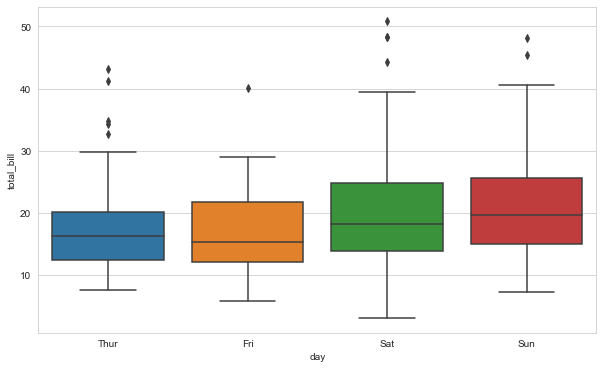

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill', data=tips) # 최저, 최고값, 평균, 분산, 표준편차 범위 => 통계적인 의미를 시각화 할 때 사용 
plt.show()

hue 옵션을 사용하면 데이터를 분류해서 시각화 할 수 있다. 

ex) 요일별 지불금액을 확인하는데, 흡연자는 얼마를 냈을까, 비흡연자는 얼마를 냈을까?

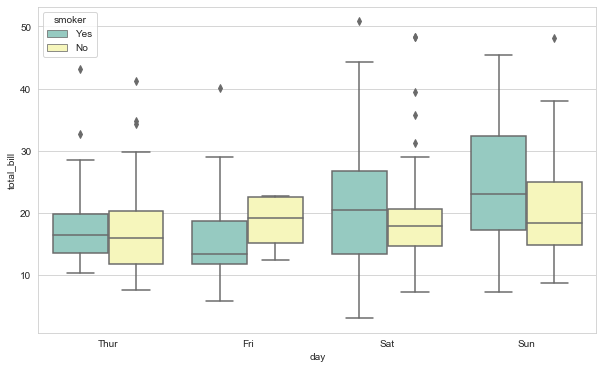

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips, palette='Set3')
plt.show()

# 산포도(scatter) 및 회귀까지 볼 수 있는 lmplot

/Users/son/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


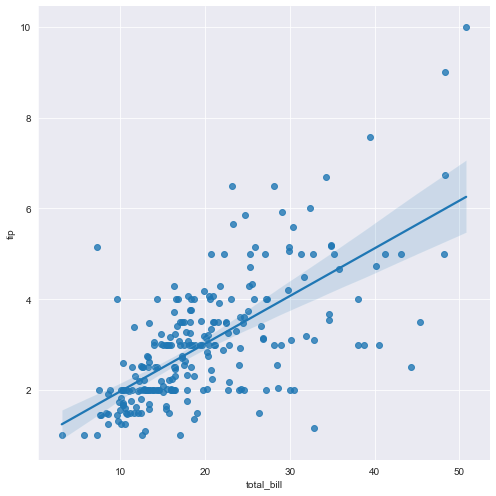

In [14]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill', y='tip', data=tips, size=7) # 지불금액이 x일 때 팁(y)는 얼마를 보통 냈는가?
plt.show()

/Users/son/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


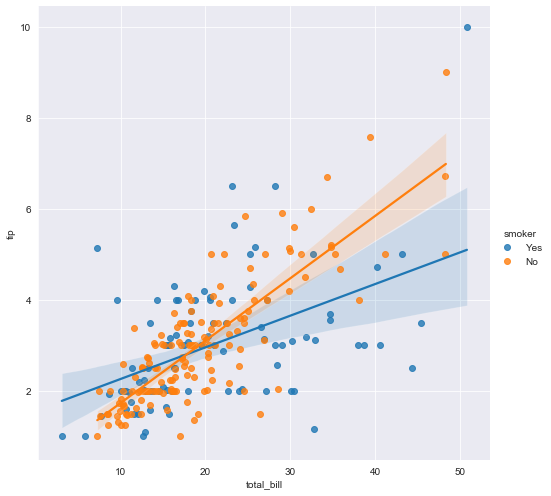

In [16]:
sns.lmplot(x='total_bill', y='tip', data=tips,hue='smoker', size=7) # 지불금액이 x일 때 팁(y)는 얼마를 보통 냈는가?
plt.show()

# 각 데이터의 크기를 색상의 농도로 표시할 때 사용이 가능

* Heat맵을 활용을 할 때는 숫자로 이루어진 데이터셋에서 활용해야 한다. 

In [31]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [32]:
# month를 인덱스로 삼고, 항목(컬럼)을 year -> 월별 탑승객 수를 확인 , 연도(year)는 항목 
flights = flights.pivot("month", "year", "passengers") # 인덱스, 컬럼, 데이터 
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [30]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


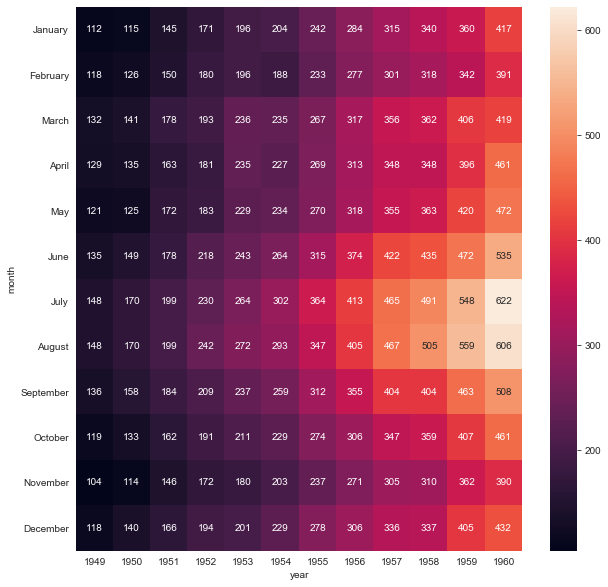

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(flights, annot=True, fmt='d') # annot : 히트맵에 숫자 표시 여부, fmt : 정수로 표현할지 실수로 표현할지 결정 
plt.show()

# 각 항목별 비교 그래프 그리기 

In [25]:
# 머신러닝 예제로 많이 사용되는 iris 데이터셋 로딩 
sns.set(style='ticks')
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


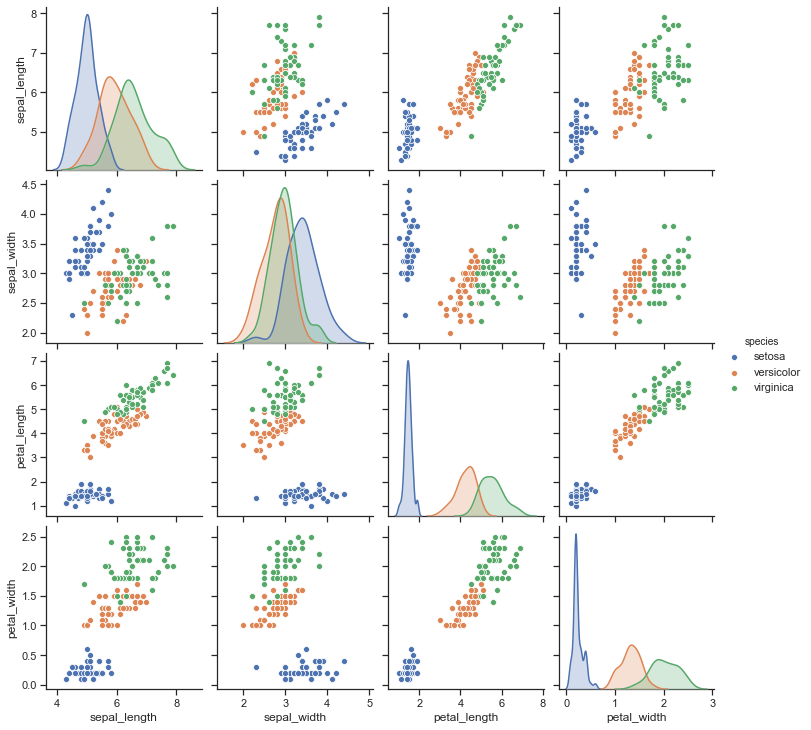

In [26]:
sns.pairplot(iris, hue='species')
plt.show()